In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

C:\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

In [3]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
dfBikes = pd.read_csv('https://kanaries-app.s3.ap-northeast-1.amazonaws.com/public-datasets/bike_sharing_dc.csv', parse_dates=[])
dfBikes.dtypes

date                object
month                int64
season              object
hour                 int64
year                 int64
holiday             object
temperature        float64
feeling_temp       float64
humidity           float64
winspeed           float64
casual               int64
registered           int64
count                int64
work yes or not      int64
am or pm            object
Day of the week      int64
dtype: object

In [5]:
estacion = dfBikes.groupby('season').size().index

estacion

Index(['fall', 'spring', 'summer', 'winter'], dtype='object', name='season')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
codificador = LabelEncoder()
dfBikes['season'] = codificador.fit_transform(dfBikes['season'])
dfBikes['holiday'] = codificador.fit_transform(dfBikes['holiday'])
dfBikes['am or pm'] = codificador.fit_transform(dfBikes['am or pm'])

In [8]:
train, test = train_test_split(dfBikes, test_size=0.4, stratify=dfBikes['season'], random_state=10)

In [9]:
train.head()

,date,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
9301,2012-01-28,1,3,11,2012,0,6.10,3.9980,56.0,8.9981,55,241,296,0,0,6
4377,2011-07-06,7,2,7,2011,0,25.84,30.0020,79.0,0.0000,24,288,312,1,0,3
2400,2011-04-14,4,1,22,2011,0,14.56,15.0002,55.0,7.0015,22,82,104,1,1,4
9673,2012-02-13,2,3,0,2012,0,-1.42,-6.9976,46.0,15.0013,0,9,9,1,0,1
15393,2012-10-08,10,0,14,2012,1,11.74,11.9972,58.0,7.0015,121,299,420,1,1,1


In [10]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10427 entries, 9301 to 4245
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             10427 non-null  object 
 1   month            10427 non-null  int64  
 2   season           10427 non-null  int32  
 3   hour             10427 non-null  int64  
 4   year             10427 non-null  int64  
 5   holiday          10427 non-null  int32  
 6   temperature      10427 non-null  float64
 7   feeling_temp     10427 non-null  float64
 8   humidity         10427 non-null  float64
 9   winspeed         10427 non-null  float64
 10  casual           10427 non-null  int64  
 11  registered       10427 non-null  int64  
 12  count            10427 non-null  int64  
 13  work yes or not  10427 non-null  int64  
 14  am or pm         10427 non-null  int32  
 15  Day of the week  10427 non-null  int64  
dtypes: float64(4), int32(3), int64(8), object(1)
memory usage: 1.

None

In [11]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6952 entries, 3550 to 7593
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             6952 non-null   object 
 1   month            6952 non-null   int64  
 2   season           6952 non-null   int32  
 3   hour             6952 non-null   int64  
 4   year             6952 non-null   int64  
 5   holiday          6952 non-null   int32  
 6   temperature      6952 non-null   float64
 7   feeling_temp     6952 non-null   float64
 8   humidity         6952 non-null   float64
 9   winspeed         6952 non-null   float64
 10  casual           6952 non-null   int64  
 11  registered       6952 non-null   int64  
 12  count            6952 non-null   int64  
 13  work yes or not  6952 non-null   int64  
 14  am or pm         6952 non-null   int32  
 15  Day of the week  6952 non-null   int64  
dtypes: float64(4), int32(3), int64(8), object(1)
memory usage: 841

None

In [12]:
train.describe()

,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
count,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000
mean,6.526805,1.493910,11.576772,2011.500336,0.027429,15.329706,15.360345,62.724657,12.717592,35.555769,153.231227,188.786995,0.853841,0.465522,2.994150
std,3.440337,1.112352,6.933692,0.500024,0.163337,9.061632,11.368995,19.183287,8.123810,48.888743,151.702694,181.342968,0.353282,0.498834,2.012541
min,1.000000,0.000000,0.000000,2011.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,6.000000,2011.000000,0.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000,1.000000,0.000000,1.000000
50%,7.000000,1.000000,12.000000,2012.000000,0.000000,15.500000,15.996800,63.000000,11.001400,17.000000,114.000000,140.000000,1.000000,0.000000,3.000000
75%,10.000000,2.000000,18.000000,2012.000000,0.000000,23.020000,24.999200,78.000000,16.997900,48.000000,218.500000,280.000000,1.000000,1.000000,5.000000
max,12.000000,3.000000,23.000000,2012.000000,1.000000,39.000000,46.997000,100.000000,54.002000,367.000000,885.000000,976.000000,1.000000,1.000000,6.000000


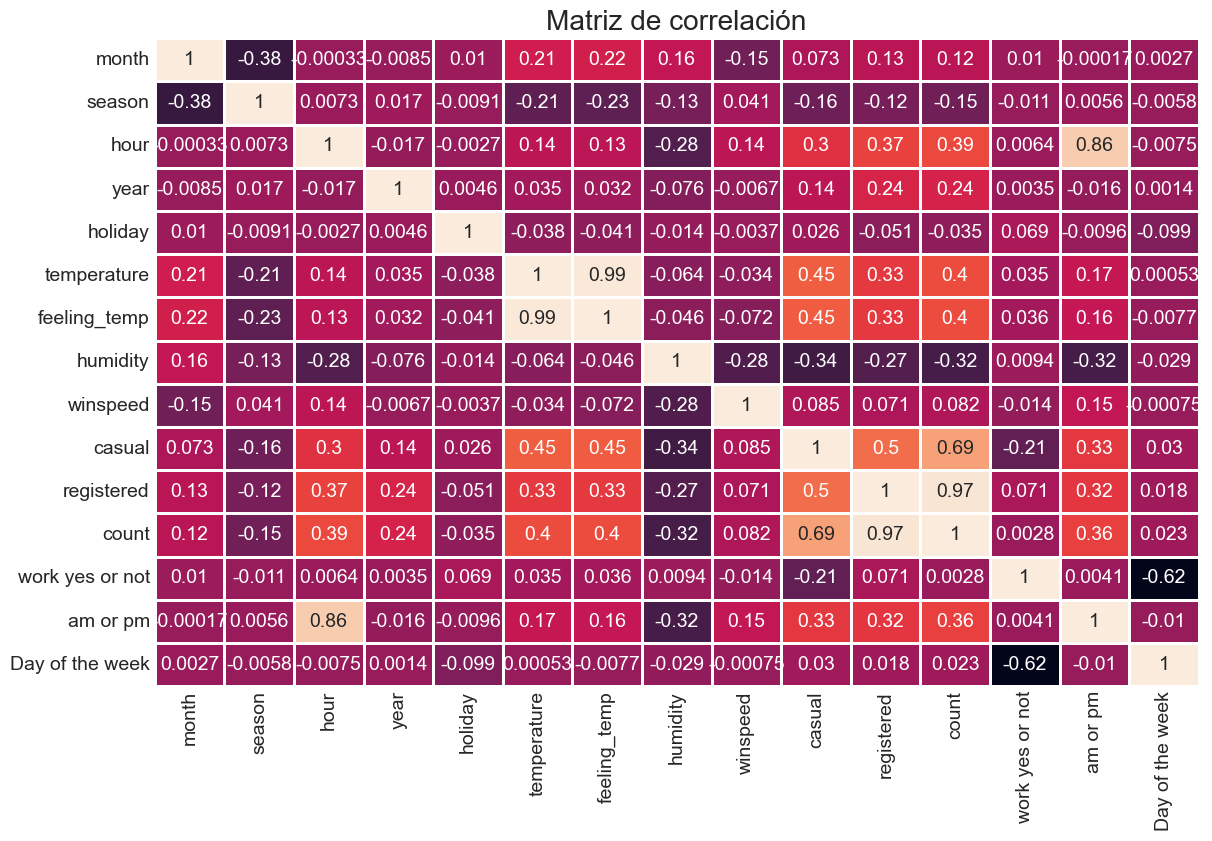

In [13]:
matriz = train.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(matriz, annot=True, cbar=False, linewidths=1)
plt.title('Matriz de correlación')
plt.show()

In [14]:
display(train['season'].value_counts())

season
2    2641
1    2639
0    2595
3    2552
Name: count, dtype: int64

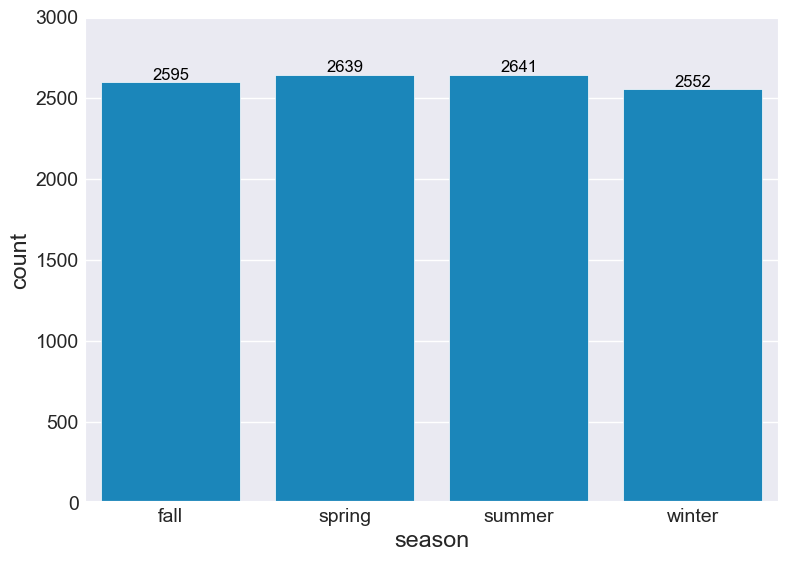

In [17]:
v

## Agrupacion por fecha y hora

In [19]:
# Convertir la fecha en el indice de la tabla 
test = test.set_index('date')
test

,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
date,,,,,,,,,,,,,,,
2011-06-01,6,2,20,2011,0,26.78,30.9986,79.0,16.9979,23,233,256,1,1,3
2012-05-25,5,1,23,2012,0,23.02,24.0026,78.0,15.0013,34,132,166,1,1,5
2012-05-20,5,1,2,2012,0,18.32,18.9998,52.0,0.0000,36,62,98,1,0,0
2012-10-26,10,0,17,2012,0,18.32,18.9998,76.0,12.9980,125,692,817,1,1,5
2011-10-05,10,0,3,2011,0,13.62,13.9970,82.0,7.0015,1,5,6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-26,12,3,16,2011,1,8.92,5.9978,43.0,19.0012,28,69,97,1,1,1
2012-04-16,4,1,5,2012,1,17.38,18.0032,77.0,15.0013,4,34,38,1,0,1
2011-10-01,10,0,9,2011,0,10.80,11.0006,82.0,23.9994,17,112,129,0,0,6


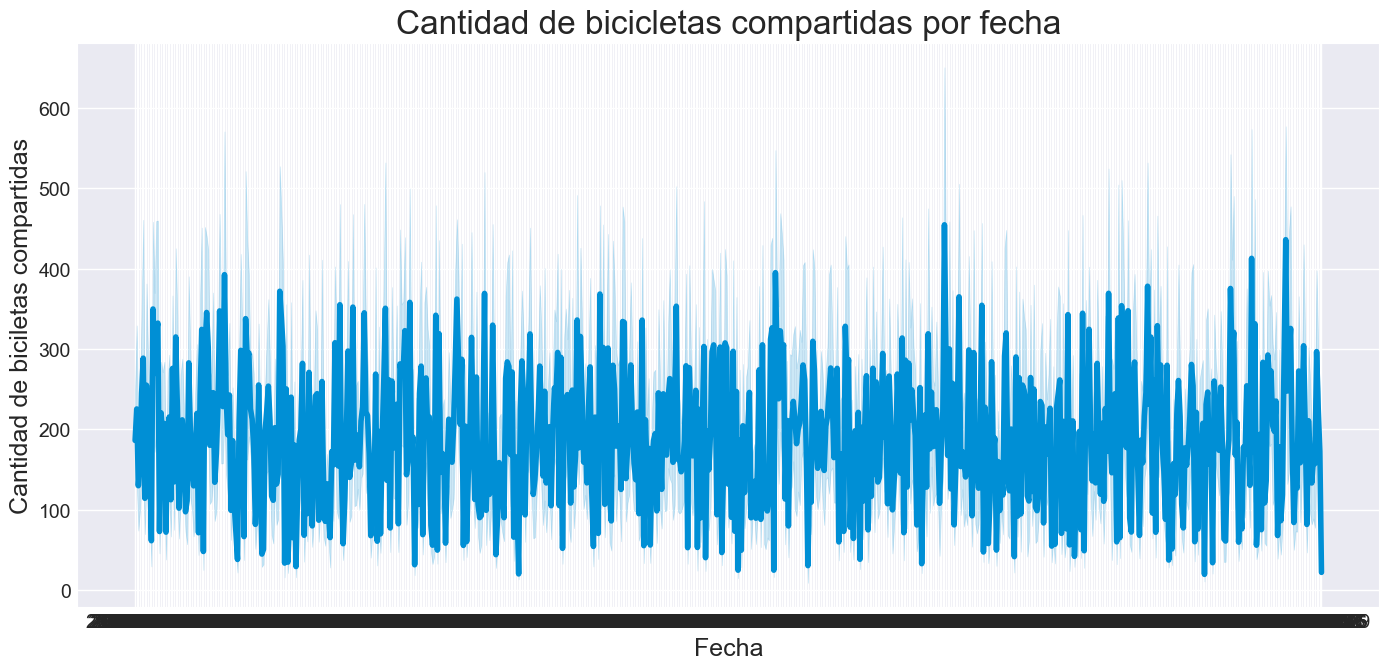

In [22]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(x='date', y='count', data=train)
ax.set_title('Cantidad de bicicletas compartidas por fecha', fontsize= 24)
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Cantidad de biciletas compartidas', fontsize=18)
plt.show()

In [23]:
train_month = pd.DataFrame(train.groupby(['year', 'month'])['count'].sum())
train_month

count
year month        
2011 1       23887
     2       29745
     3       38355
     4       58049
     5       84609
     6       79970
     7       81950
     8       86994
     9       76996
     10      82135
     11      60295
     12      53333
2012 1       55675
     2       63296
     3       94500
     4      104817
     5      120847
     6      119033
     7      123509
     8      124961
     9      125217
     10     114226
     11      91583
     12      74500

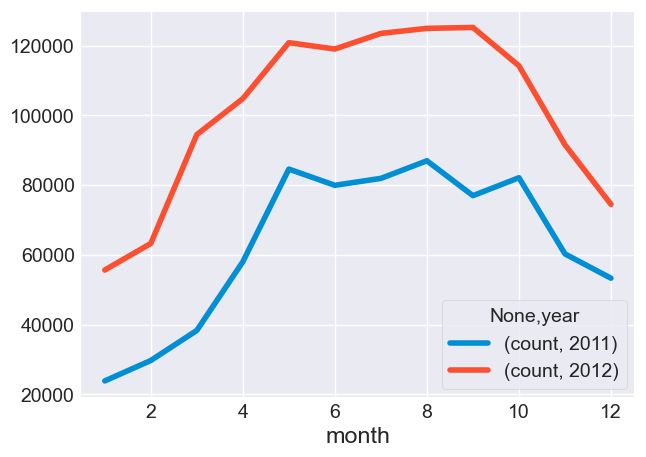

In [25]:
train_month.unstack(0).plot();

In [32]:
train_month_am_pm = pd.DataFrame(train.groupby(['year', 'month', 'am or pm'])['count'].sum())
train_month_am_pm

count
year month am or pm       
2011 1     0          8858
           1         15029
     2     0         11252
           1         18493
     3     0         13802
           1         24553
     4     0         19487
           1         38562
     5     0         28229
           1         56380
     6     0         26605
           1         53365
     7     0         26699
           1         55251
     8     0         29865
           1         57129
     9     0         26702
           1         50294
     10    0         29050
           1         53085
     11    0         22775
           1         37520
     12    0         21050
           1         32283
2012 1     0         23214
           1         32461
     2     0         25633
           1         37663
     3     0         31425
           1         63075
     4     0         38252
           1         66565
     5     0         43582
           1         77265
     6     0         43382
           1         75651
     7     0         43399
           1         80110
     8     0         45949
           1         79012
     9     0         47185
           1         78032
     10    0         42524
           1         71702
     11    0         35554
           1         56029
     12    0         29829
           1         44671

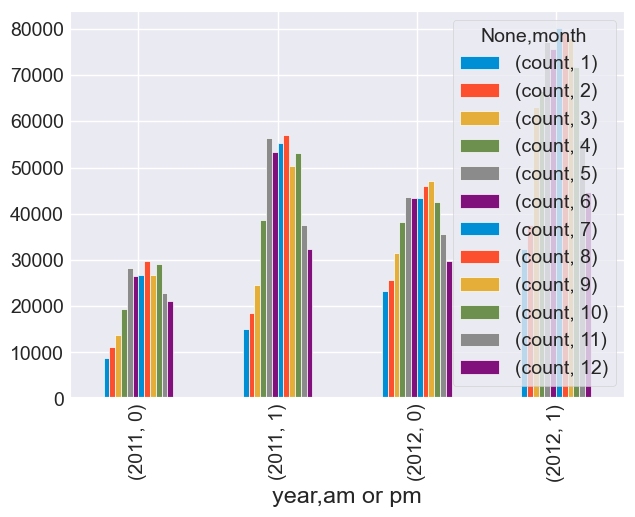

In [35]:
train_month_am_pm = pd.DataFrame(train.groupby(['year', 'month', 'am or pm'])['count'].sum())
train_month_am_pm.unstack(1).plot(kind='bar');

In [36]:
# convertir la fehc aen el indice de tabla
train_month = train.set_index('date').resample('M').sum()
train_month

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'